In [9]:
from rdkit.Chem import RDConfig
import rdkit as rd
import os
import sys
from openbabel import openbabel as ob
from openbabel import pybel as pb
sys.path.append(os.path.join(RDConfig.RDContribDir, "SA_Score"))
import sascorer
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
f_file = open("frags.smi")
frags = f_file.read().split("\n")
frags = [re.sub(r'\s+', '', frag) for frag in frags if '.' not in frag]

In [5]:
sa_result = dict()
error = []
for frag in frags:
    try:
        mol = rd.Chem.MolFromSmiles(frag)

        sa_result[frag] = sascorer.calculateScore(mol)
    except Exception as e:
        error.append(frag)

<Axes: ylabel='Count'>

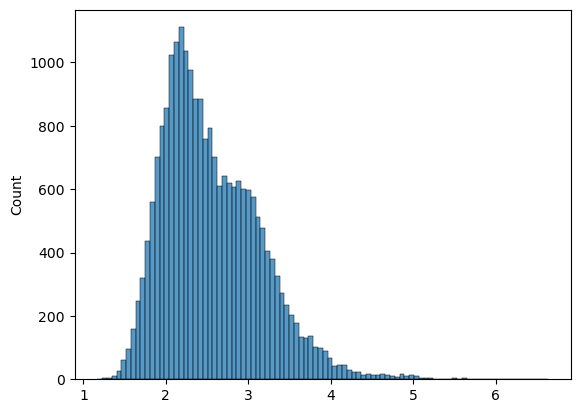

In [10]:
sns.histplot(data=list(sa_result.values()))